# ASSIGNMENT 2 - MCAR test

# Group No: 21

**1. Bhatt Khelan(202411025)**

**2. Dishant Patel(202201260)**

**3. Pritish Desai(202201312)**

**github_link** = https://github.com/pdishant5/IT-462-Exploratory-Data-Analysis-Group21

# Data Loading and Exploring

In [3]:
# Load the Dataset form google sheets
import pandas as pd
import missingno as msno
df = pd.read_csv('/content/public_emdat_project (1).csv')
df.head()

,DisNo.,Historic,Classification Key,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,External IDs,Event Name,ISO,...,Reconstruction Costs ('000 US$),"Reconstruction Costs, Adjusted ('000 US$)",Insured Damage ('000 US$),"Insured Damage, Adjusted ('000 US$)",Total Damage ('000 US$),"Total Damage, Adjusted ('000 US$)",CPI,Admin Units,Entry Date,Last Update
0,1999-9388-DJI,No,nat-cli-dro-dro,Natural,Climatological,Drought,Drought,NaN,NaN,DJI,...,NaN,NaN,NaN,NaN,NaN,NaN,58.111474,"[{""adm1_code"":1093,""adm1_name"":""Ali Sabieh""},{...",2006-03-01,2023-09-25
1,1999-9388-SDN,No,nat-cli-dro-dro,Natural,Climatological,Drought,Drought,NaN,NaN,SDN,...,NaN,NaN,NaN,NaN,NaN,NaN,56.514291,"[{""adm1_code"":2757,""adm1_name"":""Northern Darfu...",2006-03-08,2023-09-25
2,1999-9388-SOM,No,nat-cli-dro-dro,Natural,Climatological,Drought,Drought,NaN,NaN,SOM,...,NaN,NaN,NaN,NaN,NaN,NaN,56.514291,"[{""adm1_code"":2691,""adm1_name"":""Bay""},{""adm1_c...",2006-03-08,2023-09-25
3,2000-0001-AGO,No,tec-tra-roa-roa,Technological,Transport,Road,Road,NaN,NaN,AGO,...,NaN,NaN,NaN,NaN,NaN,NaN,56.514291,NaN,2004-10-27,2023-09-25
4,2000-0002-AGO,No,nat-hyd-flo-riv,Natural,Hydrological,Flood,Riverine flood,NaN,NaN,AGO,...,NaN,NaN,NaN,NaN,10000.0,17695.0,56.514291,"[{""adm2_code"":4214,""adm2_name"":""Baia Farta""},{...",2005-02-03,2023-09-25


In [4]:
# Getting the shape of the DataFrame as a tuple (number of rows, number of columns)
df.shape

(15784, 46)

In [5]:
# Getting Basic Information of Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15784 entries, 0 to 15783
Data columns (total 46 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   DisNo.                                     15784 non-null  object 
 1   Historic                                   15784 non-null  object 
 2   Classification Key                         15784 non-null  object 
 3   Disaster Group                             15784 non-null  object 
 4   Disaster Subgroup                          15784 non-null  object 
 5   Disaster Type                              15784 non-null  object 
 6   Disaster Subtype                           15784 non-null  object 
 7   External IDs                               2405 non-null   object 
 8   Event Name                                 4955 non-null   object 
 9   ISO                                        15784 non-null  object 
 10  Country               

In [6]:
# Check the data types of each column
print(df.dtypes)

DisNo.                                        object
Historic                                      object
Classification Key                            object
Disaster Group                                object
Disaster Subgroup                             object
Disaster Type                                 object
Disaster Subtype                              object
External IDs                                  object
Event Name                                    object
ISO                                           object
Country                                       object
Subregion                                     object
Region                                        object
Location                                      object
Origin                                        object
Associated Types                              object
OFDA/BHA Response                             object
Appeal                                        object
Declaration                                   

# Find Missing Values

In [7]:
missing_details = df.isnull().sum()
missing_details

,0
DisNo.,0
Historic,0
Classification Key,0
Disaster Group,0
Disaster Subgroup,0
Disaster Type,0
Disaster Subtype,0
External IDs,13379
Event Name,10829
ISO,0


# Using missingno for Visulizing the missing data

<Axes: >

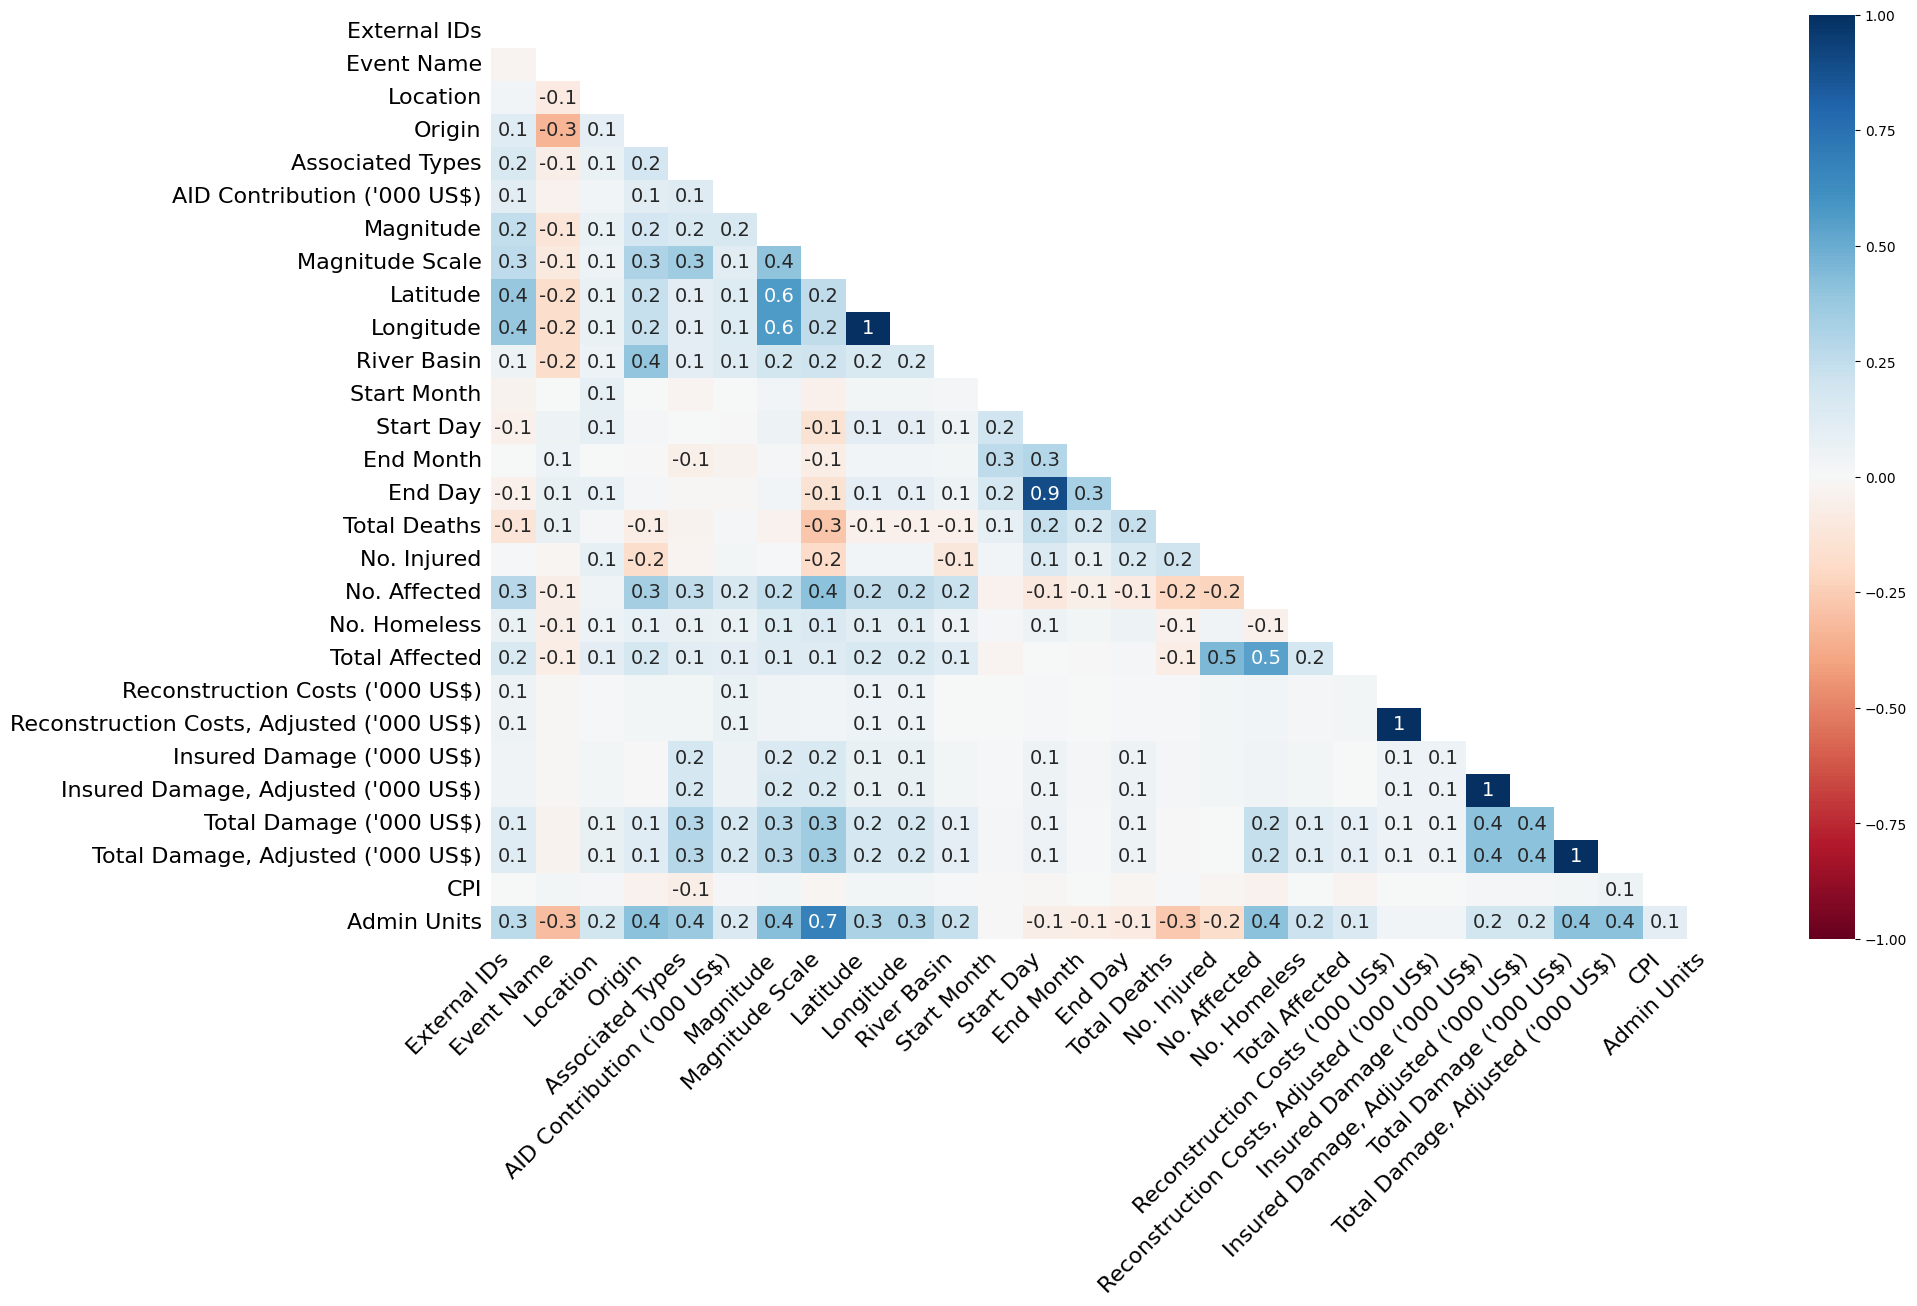

In [9]:
msno.heatmap(df)

*   From here also we can see that all the columns are related to each other, So result of MCAR test must be negative.



#Data Transformation

In [10]:
from sklearn.preprocessing import LabelEncoder
label_encoders = {
    column: LabelEncoder().fit(df[column])
    for column in df.select_dtypes(include=['object']).columns
}

for column, encoder in label_encoders.items():
    df[column] = encoder.transform(df[column])

df.head()

,DisNo.,Historic,Classification Key,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,External IDs,Event Name,ISO,...,Reconstruction Costs ('000 US$),"Reconstruction Costs, Adjusted ('000 US$)",Insured Damage ('000 US$),"Insured Damage, Adjusted ('000 US$)",Total Damage ('000 US$),"Total Damage, Adjusted ('000 US$)",CPI,Admin Units,Entry Date,Last Update
0,0,0,7,0,1,5,14,1826,2096,51,...,NaN,NaN,NaN,NaN,NaN,NaN,58.111474,88,404,0
1,1,0,7,0,1,5,14,1826,2096,170,...,NaN,NaN,NaN,NaN,NaN,NaN,56.514291,2011,407,0
2,2,0,7,0,1,5,14,1826,2096,177,...,NaN,NaN,NaN,NaN,NaN,NaN,56.514291,1859,407,0
3,3,0,60,1,8,26,45,1826,2096,1,...,NaN,NaN,NaN,NaN,NaN,NaN,56.514291,6971,203,0
4,4,0,25,0,4,13,44,1826,2096,1,...,NaN,NaN,NaN,NaN,10000.0,17695.0,56.514291,6346,235,0


# MCAR test

In [ ]:
!pip install missingpy

In [ ]:
!pip install statsmodels

   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.9 MB ? eta -:--:--
   ---- ----------------------------------- 1.0/9.9 MB 2.8 MB/s eta 0:00:04
   ------- -------------------------------- 1.8/9.9 MB 3.5 MB/s eta 0:00:03
   --------- ------------------------------ 2.4/9.9 MB 3.4 MB/s eta 0:00:03
   ------------ --------------------------- 3.1/9.9 MB 3.3 MB/s eta 0:00:03
   --------------- ------------------------ 3.9/9.9 MB 3.3 MB/s eta 0:00:02
   ------------------ --------------------- 4.5/9.9 MB 3.2 MB/s eta 0:00:02
   --------------------- ------------------ 5.2/9.9 MB 3.3 MB/s eta 0:00:02
   ------------------------ --------------- 6.0/9.9 MB 3.3 MB/s eta 0:00:02
   --------------------------- ------------ 6.8/9.9 MB 3.4 MB/s eta 0:00:01
   ------------------------------ --------- 7.6/9.9 MB 3.4 MB/s eta 0:00:01
   ---------------------------------- ----- 8.4/9.9 MB 3.4 MB/s eta 0:00:01
   -----------------------

In [11]:
import numpy as np
from statsmodels.stats import weightstats as stests
from scipy.stats import chi2

def little_mcar_test(df):
    n = df.shape[0]
    n_miss = df.isnull().sum().sum()

    proportions_missing = df.isnull().mean()

    chi_square = (n_miss ** 2) / ((n - 1) * proportions_missing.sum())

    df_m = df.shape[1] - 1

    p_value = 1 - chi2.cdf(chi_square, df_m)

    return chi_square, p_value

chi_square, p_value = little_mcar_test(df)
print(f"Chi-Square Statistic: {chi_square}")
print(f"P-Value for MCAR test: {p_value}")

Chi-Square Statistic: 186303.80333269972
P-Value for MCAR test: 0.0


* P-value is 0 means, our missing data is **not MCAR**




# KNN Imputer to fill missing values

In [12]:
from sklearn.impute import KNNImputer
knn_imputer = KNNImputer()
df_imputed_knn = pd.DataFrame(knn_imputer.fit_transform(df), columns=df.columns)
print(df_imputed_knn.head())

   DisNo.  Historic  Classification Key  Disaster Group  Disaster Subgroup  \
0     0.0       0.0                 7.0             0.0                1.0   
1     1.0       0.0                 7.0             0.0                1.0   
2     2.0       0.0                 7.0             0.0                1.0   
3     3.0       0.0                60.0             1.0                8.0   
4     4.0       0.0                25.0             0.0                4.0   

   Disaster Type  Disaster Subtype  External IDs  Event Name    ISO  ...  \
0            5.0              14.0        1826.0      2096.0   51.0  ...   
1            5.0              14.0        1826.0      2096.0  170.0  ...   
2            5.0              14.0        1826.0      2096.0  177.0  ...   
3           26.0              45.0        1826.0      2096.0    1.0  ...   
4           13.0              44.0        1826.0      2096.0    1.0  ...   

   Reconstruction Costs ('000 US$)  Reconstruction Costs, Adjusted ('000 U

In [13]:
print(df_imputed_knn.isnull().sum())

DisNo.                                       0
Historic                                     0
Classification Key                           0
Disaster Group                               0
Disaster Subgroup                            0
Disaster Type                                0
Disaster Subtype                             0
External IDs                                 0
Event Name                                   0
ISO                                          0
Country                                      0
Subregion                                    0
Region                                       0
Location                                     0
Origin                                       0
Associated Types                             0
OFDA/BHA Response                            0
Appeal                                       0
Declaration                                  0
AID Contribution ('000 US$)                  0
Magnitude                                    0
Magnitude Sca

# MissForest Imputer to fill missing values

In [14]:
# missingpy library is not working so we have used alternative
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error
from sklearn.utils import resample

def custom_missforest(df, n_iterations=10):
    df_imputed = df.copy()

    for _ in range(n_iterations):
        for column in df_imputed.columns:
            if df_imputed[column].isnull().any():
                df_missing = df_imputed[df_imputed[column].isnull()]
                df_non_missing = df_imputed[df_imputed[column].notnull()]

                if df_non_missing.empty:
                    continue

                X_train = df_non_missing.drop(columns=column)
                y_train = df_non_missing[column]
                X_test = df_missing.drop(columns=column)

                X_train = X_train.fillna(X_train.mean())
                X_test = X_test.fillna(X_train.mean())

                if y_train.dtype == 'object' or df_imputed[column].dtype == 'object':
                    model = RandomForestClassifier(n_estimators=100)
                    model.fit(X_train, y_train)
                    df_imputed.loc[df_imputed[column].isnull(), column] = model.predict(X_test)
                else:
                    model = RandomForestRegressor(n_estimators=100)
                    model.fit(X_train, y_train)
                    df_imputed.loc[df_imputed[column].isnull(), column] = model.predict(X_test)

    return df_imputed

df_imputed_missforest = custom_missforest(df)

print("Imputed DataFrame:")
print(df_imputed_missforest)

Imputed DataFrame:
       DisNo.  Historic  Classification Key  Disaster Group  \
0           0         0                   7               0   
1           1         0                   7               0   
2           2         0                   7               0   
3           3         0                  60               1   
4           4         0                  25               0   
...       ...       ...                 ...             ...   
15779   15779         0                   7               0   
15780   15780         0                   7               0   
15781   15781         0                   7               0   
15782   15782         0                   7               0   
15783   15783         0                   7               0   

       Disaster Subgroup  Disaster Type  Disaster Subtype  External IDs  \
0                      1              5                14          1826   
1                      1              5                14          1826   

In [15]:
df_imputed_missforest.isnull().sum()

,0
DisNo.,0
Historic,0
Classification Key,0
Disaster Group,0
Disaster Subgroup,0
Disaster Type,0
Disaster Subtype,0
External IDs,0
Event Name,0
ISO,0


* Missing entries are imputed with estimated values predicted by random forest models. These predictions are made using other observed data from the dataset, allowing for more accurate estimates of missing values.

* Due to the inherent randomness in random forest models—particularly when using a bootstrap sampling approach for training individual trees—re-running the code multiple times may result in slight variations in the imputed values.

* Random forests handle missing data well due to their ability to leverage correlations between features, and the ensemble nature of the method helps provide robust estimates.

* Additionally, random forests can maintain the variability in the dataset, which is often lost with simpler imputation methods like mean or median replacement, leading to better data quality for downstream analysis.